# Обзор данных

Анализ датасета с кривыми доходности


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)


## Загрузка данных


In [2]:
df = pd.read_csv('data.csv')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df.set_index('date', inplace=True)

print(f"Период: {df.index.min().date()} - {df.index.max().date()}")
print(f"Наблюдений: {len(df)}")
print(f"Сроки: {', '.join(map(str, df.columns.astype(float).values))} лет")


Период: 2020-11-02 - 2025-10-31
Наблюдений: 1256
Сроки: 0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0, 30.0 лет


## Статистика


In [3]:
df.describe()


,0.25,0.5,0.75,1,2,3,5,7,10,15,20,30
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,11.465987,11.346234,11.280470,11.243503,11.203360,11.205374,11.254291,11.302564,11.342604,11.383280,11.417874,11.476943
std,5.336829,5.135476,4.989146,4.867224,4.468774,4.142611,3.672594,3.385240,3.142142,2.951391,2.868776,2.814378
min,3.680000,3.870000,3.990000,4.080000,4.420000,4.770000,5.250000,5.660000,6.100000,6.440000,6.610000,6.790000
25%,7.200000,7.267500,7.347500,7.440000,7.897500,8.350000,8.577500,8.690000,8.847500,8.930000,8.922500,8.857500
50%,9.970000,9.945000,9.870000,9.960000,9.825000,9.880000,10.210000,10.485000,10.990000,11.400000,11.570000,11.730000
75%,15.150000,14.980000,14.907500,14.852500,14.622500,14.492500,14.535000,14.580000,14.570000,14.367500,14.242500,14.262500
max,23.620000,23.360000,23.070000,22.780000,21.550000,20.710000,19.260000,18.080000,16.890000,16.290000,16.190000,16.120000


## Динамика ставок во времени


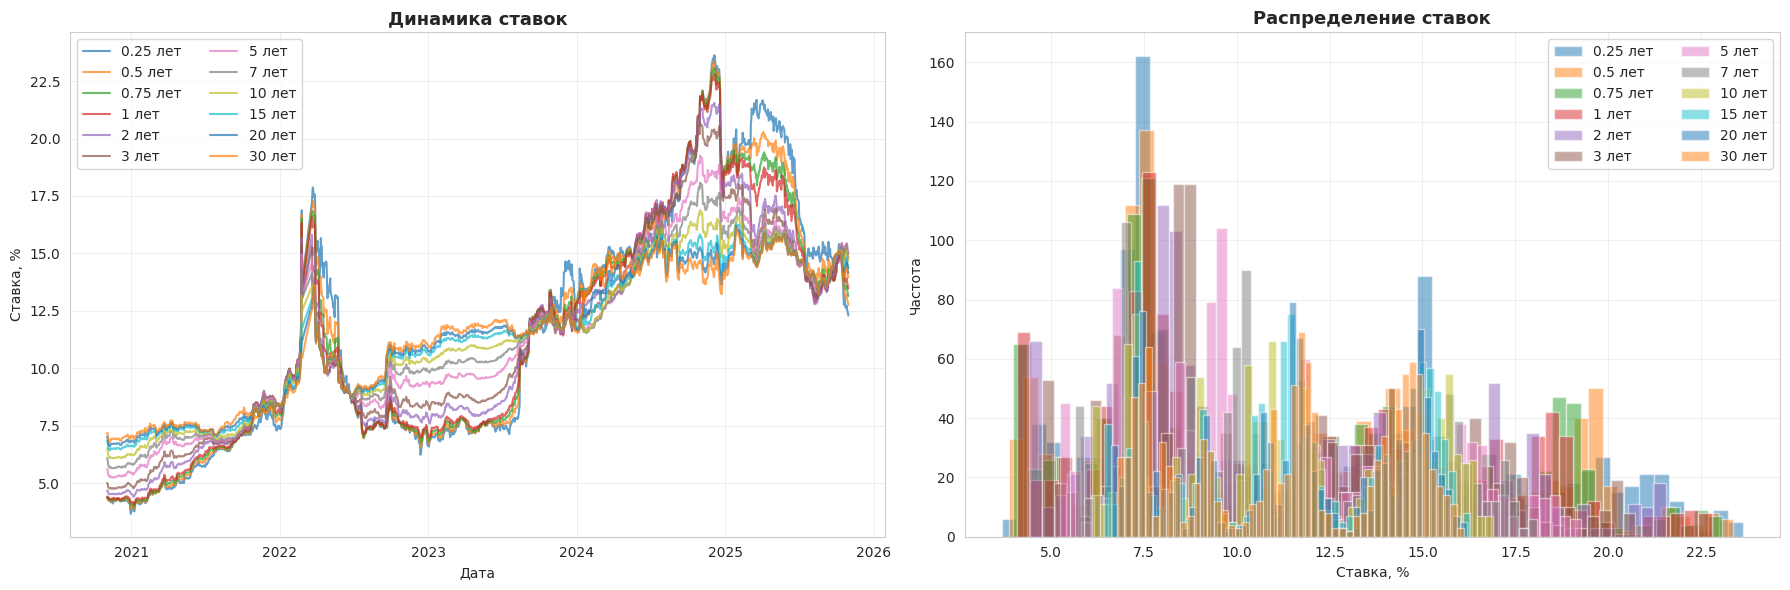

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for col in df.columns:
    axes[0].plot(df.index, df[col], label=f'{col} лет', alpha=0.7)
axes[0].set_title('Динамика ставок', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Ставка, %')
axes[0].legend(ncol=2)
axes[0].grid(True, alpha=0.3)

for col in df.columns:
    axes[1].hist(df[col], bins=50, alpha=0.5, label=f'{col} лет')
axes[1].set_title('Распределение ставок', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Ставка, %')
axes[1].set_ylabel('Частота')
axes[1].legend(ncol=2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Форма кривой доходности


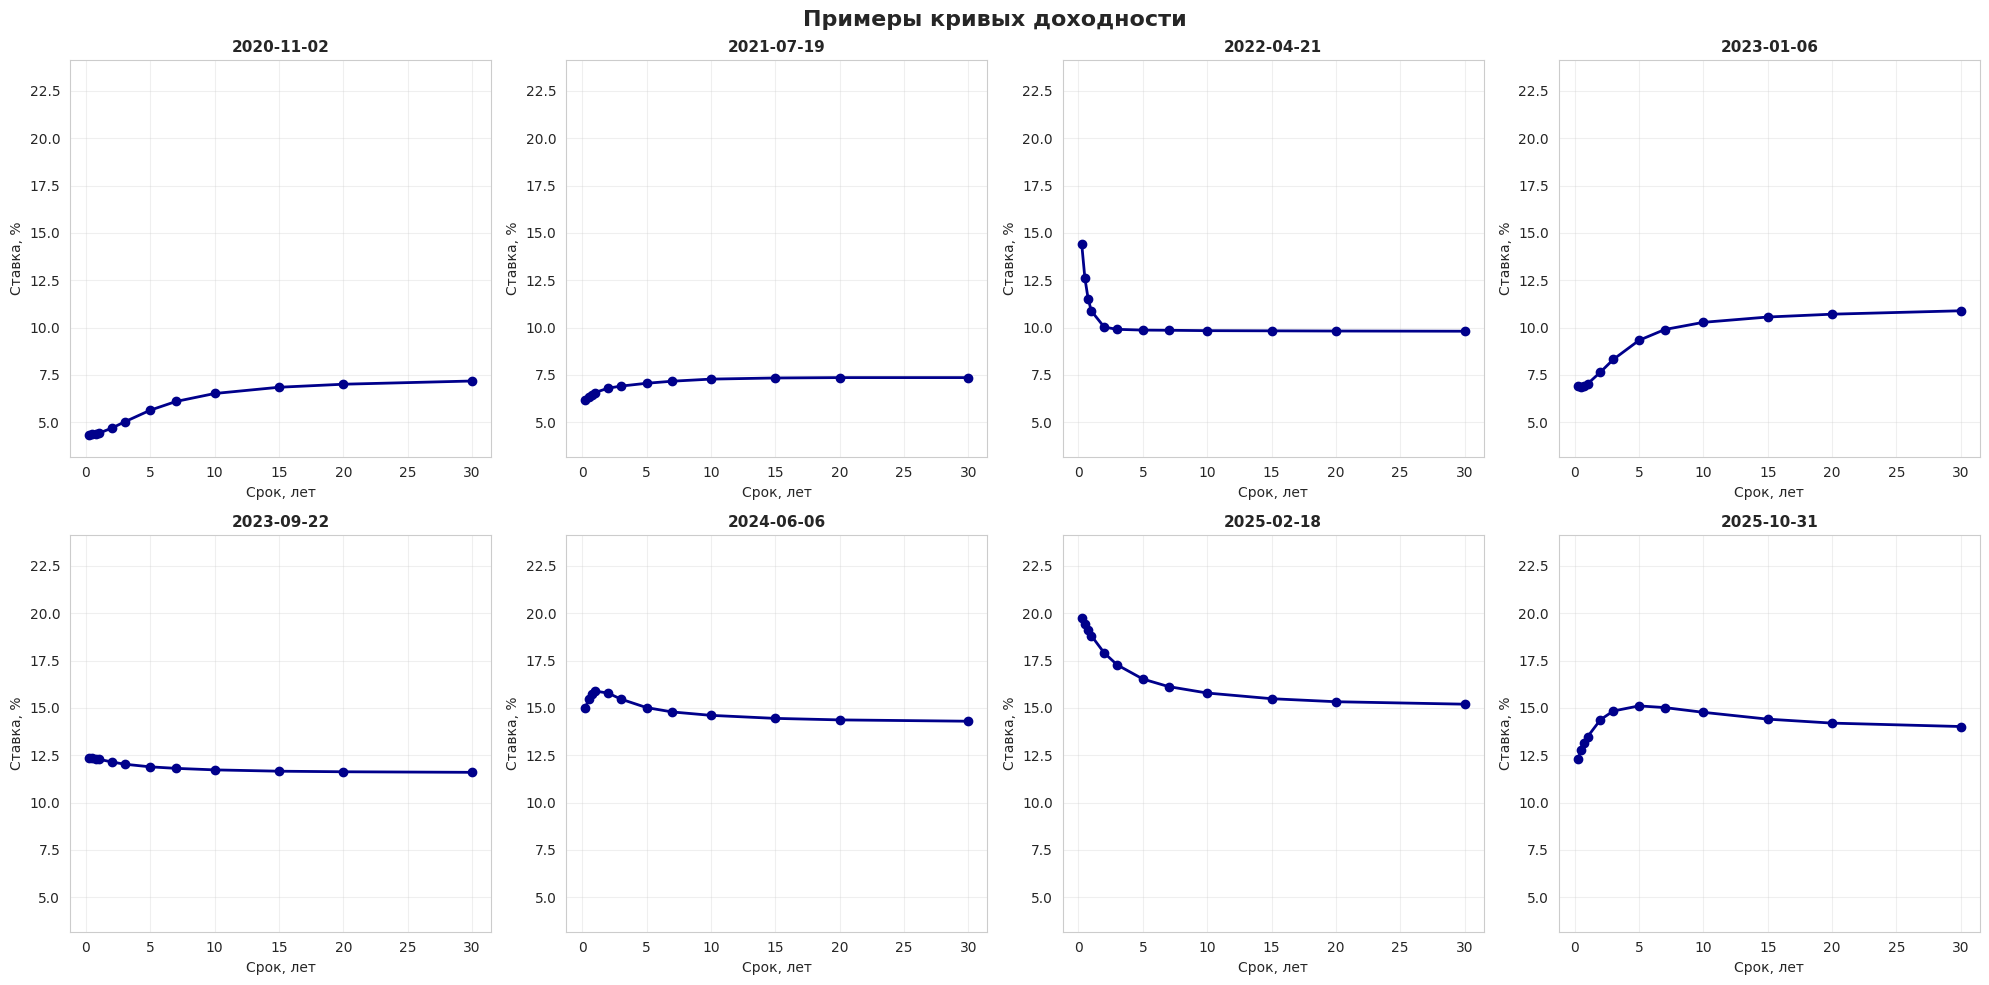

In [5]:
sample_indices = np.linspace(0, len(df)-1, 8, dtype=int)
maturities = df.columns.astype(float).values

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, idx in enumerate(sample_indices):
    date = df.index[idx]
    yields = df.iloc[idx].values
    
    axes[i].plot(maturities, yields, 'o-', linewidth=2, markersize=6, color='darkblue')
    axes[i].set_title(f'{date.date()}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Срок, лет', fontsize=10)
    axes[i].set_ylabel('Ставка, %', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(df.min().min() - 0.5, df.max().max() + 0.5)

plt.suptitle('Примеры кривых доходности', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## Корреляция между сроками


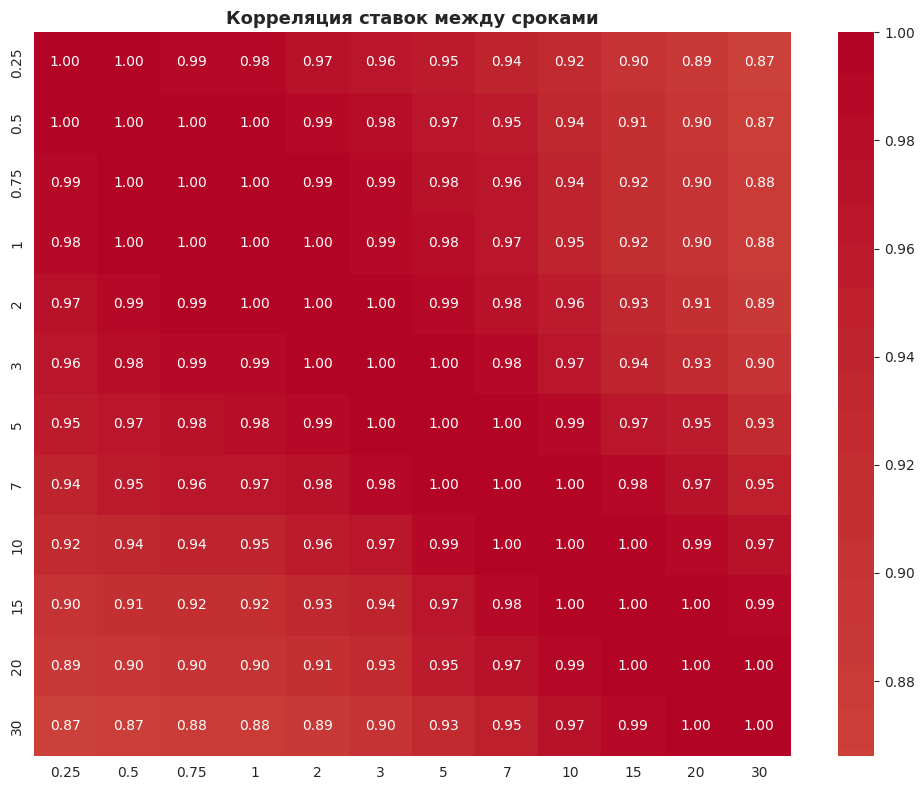

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляция ставок между сроками', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()
